<a href="https://colab.research.google.com/github/mvince33/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
- Michael Vincent

## Part 1

In [1]:
import pandas as pd
path = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Part 2

In [2]:
# Get the dimensions of the data set
df.shape

print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 8523 rows and 12 columns.


In [3]:
# Find the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Check for duplicates
df.duplicated().sum()

print(f"There are {df.duplicated().sum()} duplicates in the data set.")

There are 0 duplicates in the data set.


In [5]:
# Look for null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> We see that 'Item_Weght' and 'Outlet_Size' have missing values.

In [6]:
# Dropping the columns with missing data would likely result in a loss of good information so we will keep the columns.
# We would also potentially lose good information by dropping rows with missing data.

# For item weight we will fill the missing entries with the average value of that column.
avg_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(avg_weight, inplace=True)

# Confirm there are no missing values in the 'Item_Weight' column.
df['Item_Weight'].isna().sum()

0

In [7]:
# We will try to make an association between 'Outlet_Size' and 'Item_Outlet_Sales'
# as a predictor for the missing values of 'Outlet_Size'.
cols = ['Outlet_Size', 'Item_Outlet_Sales']
filter_small = df['Outlet_Size'] == 'Small'
filter_medium = df['Outlet_Size'] == 'Medium'
filter_high = df['Outlet_Size'] == 'High'

print(df.loc[filter_small, cols].describe())
print(df.loc[filter_medium, cols].describe())
print(df.loc[filter_high, cols].describe())

# While it seems reasonable to associate sales with 'Small'. It does not
# seem reasonable to associate sales with 'Medium' or 'High' due to overlap in values.

       Item_Outlet_Sales
count        2388.000000
mean         1912.149161
std          1582.370364
min            33.955800
25%           601.050950
50%          1544.656000
75%          2824.323600
max          9779.936200
       Item_Outlet_Sales
count        2793.000000
mean         2681.603542
std          1855.210528
min            69.243200
25%          1270.346400
50%          2251.069800
75%          3691.195200
max         13086.964800
       Item_Outlet_Sales
count         932.000000
mean         2298.995256
std          1533.531664
min            73.238000
25%          1072.603800
50%          2050.664000
75%          3166.378350
max         10256.649000


In [8]:
# Perhaps there's an association between 'Outlet_Size' and 'Outlet_Identifier'.
print(df.loc[filter_small, ['Outlet_Size', 'Outlet_Identifier']].value_counts())
print(df.loc[filter_medium, ['Outlet_Size', 'Outlet_Identifier']].value_counts())
print(df.loc[filter_high, ['Outlet_Size', 'Outlet_Identifier']].value_counts())

print(df['Outlet_Identifier'].value_counts())

# This approach will not work as there does not seem to be a clear pattern between
# 'Outlet_Size' and 'Outlet_Identifier'.

Outlet_Size  Outlet_Identifier
Small        OUT035               930
             OUT046               930
             OUT019               528
dtype: int64
Outlet_Size  Outlet_Identifier
Medium       OUT027               935
             OUT049               930
             OUT018               928
dtype: int64
Outlet_Size  Outlet_Identifier
High         OUT013               932
dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


The above analyses did not lead us to any conclusions, but they are included to illustrate how I was thinkning about this issue.

In [9]:
# The above attempts to find a relationship between 'Outlet_Size' and
# other features did not bear fruit, so we will fill the missing values 
# the most common value.

print(df['Outlet_Size'].value_counts())

# I initially filled the missing values with 'Medium.'
# I switched to 'Missing' as that seems to be better
# practice in data science.
df['Outlet_Size'].fillna('Missing', inplace=True)

# Confirm the missing values have been filled.
df['Outlet_Size']
df['Outlet_Size'].isna().sum()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


0

In [10]:
# We now search for inconsistent labels in our data
# Use nunique to identify potntially problematic features.
df.nunique()

# Check 'Item_Fat_Content
df['Item_Fat_Content'].value_counts()
# It is reasonable to assume 'Low Fat', 'LF', and 'low fat' are 
# all the same category.
df['Item_Fat_Content'].replace(['Low Fat', 'LF', 'low fat', 'reg'], 
                               ['Low_Fat', 'Low_Fat', 'Low_Fat', 'Regular'],
                               inplace=True)

# Confirm the name changes
df['Item_Fat_Content'].value_counts()

Low_Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
# Continue looking for inconsistent labels
print(df.nunique())
print()

# Check the remaining features
df['Item_Type'].value_counts()
df['Outlet_Identifier'].value_counts()
df['Outlet_Establishment_Year'].value_counts()
df['Outlet_Location_Type'].value_counts()
df['Outlet_Type'].value_counts()

# 'Item_Fat_Content' was the only column we 
# found with inconsistent labels.

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64



Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [12]:
# Find the summary statistics of the numeric data.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Part 3

In [13]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



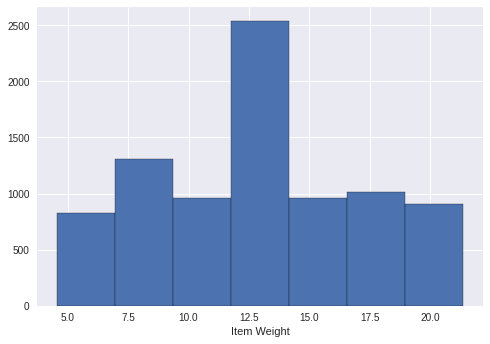

In [14]:
# Construct histograms of the quantitative data
# Redisplay the features 
df.info()
print()
plt.style.use('seaborn');
plt.xlabel('Item Weight');
df['Item_Weight'].hist(bins = 7, edgecolor = 'black')


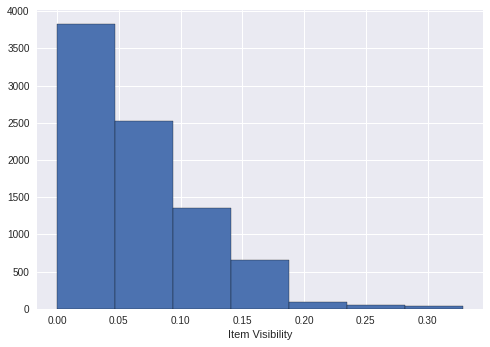

In [15]:
plt.xlabel('Item Visibility');
df['Item_Visibility'].hist(bins = 7, edgecolor = 'black');

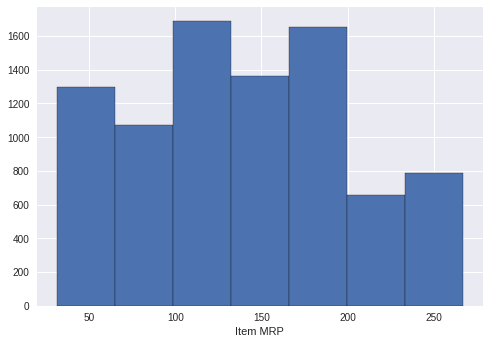

In [16]:
plt.xlabel('Item MRP');
df['Item_MRP'].hist(bins = 7, edgecolor = 'black');

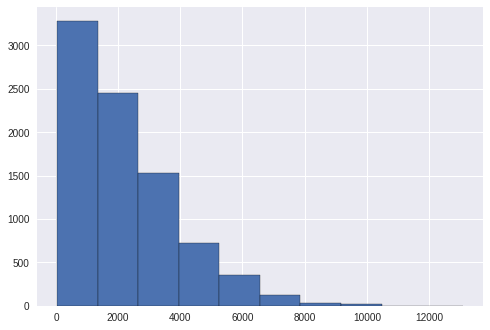

In [17]:
# We skip 'Outlet Establishment Year' as its histogram
# is not very revealing
df['Item_Outlet_Sales'].hist(bins = 10, edgecolor = 'black');

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



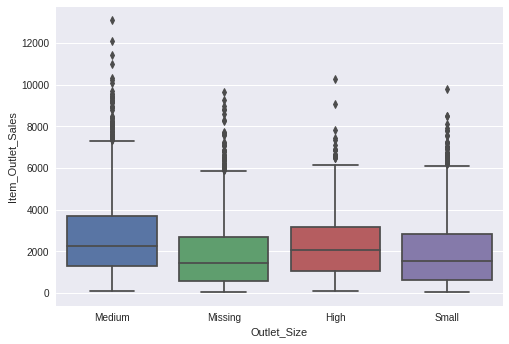

In [18]:
# Construct boxplots for the variables involving the Outlets
df.info()
print()

# Make boxplots for 'Item Outlet Sales' vs. 'Outlet Size'
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df);

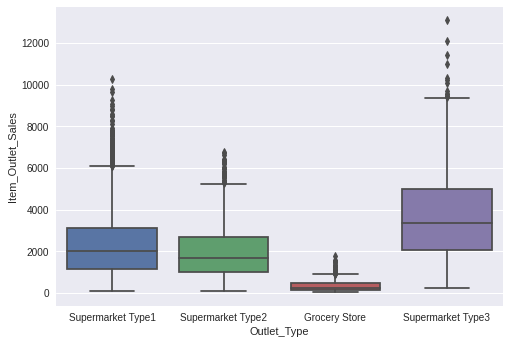

In [19]:
# Make boxplots for 'Item Outlet Sales' vs. 'Outlet_Type'.
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = df);

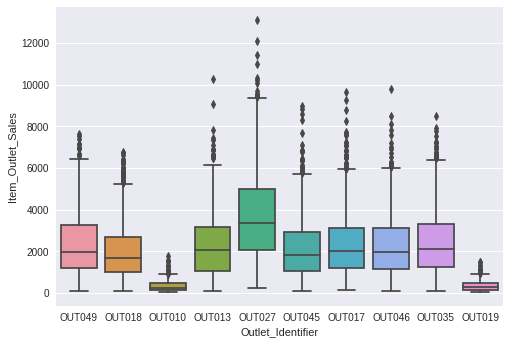

In [20]:
# Make boxplots for 'Item Outlet Sales' vs. 'Outlet Identifier'.
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = df);

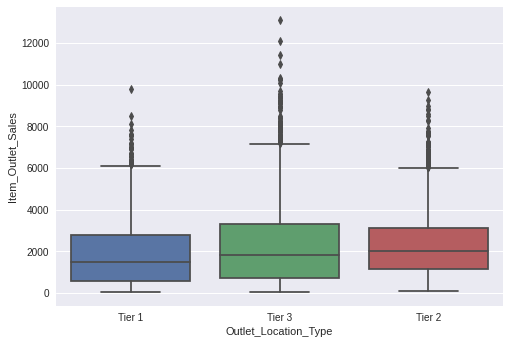

In [21]:
# Make boxplots for 'Item Outlet Sales' vs. 'Outlet Location Type'
sns.boxplot(x = 'Outlet_Location_Type', y= 'Item_Outlet_Sales', data = df);

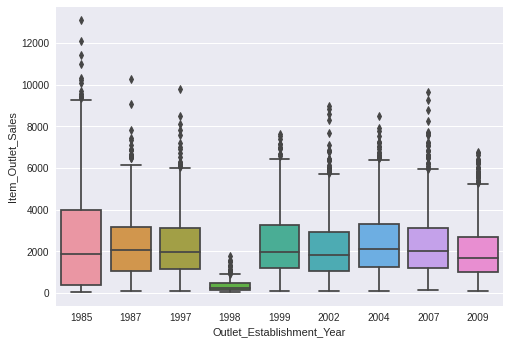

In [22]:
# Make boxplots for 'Item Outlet Sales' vs. 'Outlet Establishment Year'.
sns.boxplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Item_Identifier              1559
Item_Weigh

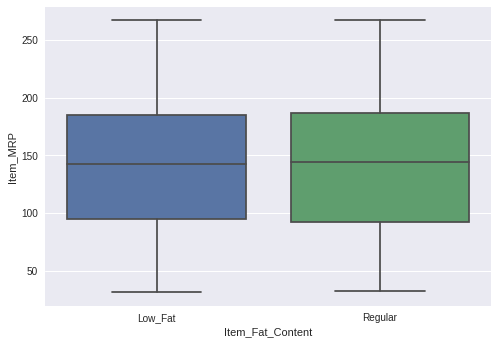

In [23]:
# Make boxplots for the "Item" variables
df.info()
print()
print(df.nunique())

# Make a boxplot for 'Item MRP' vs. 'Item Fat Content'.
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_MRP', data = df);

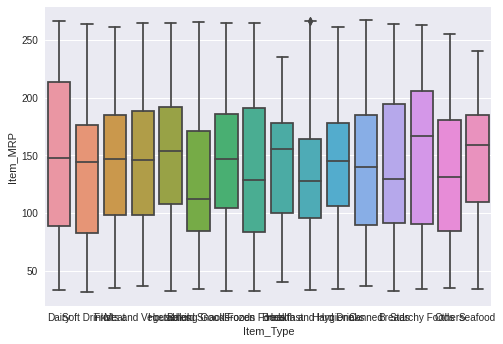

In [24]:
# Make boxplots for 'Item MRP' vs. 'Item Type'.
sns.boxplot(x = 'Item_Type', y = 'Item_MRP', data = df);


We don't like the labels on the above boxplot so we take the time to construct a prettier boxplot.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


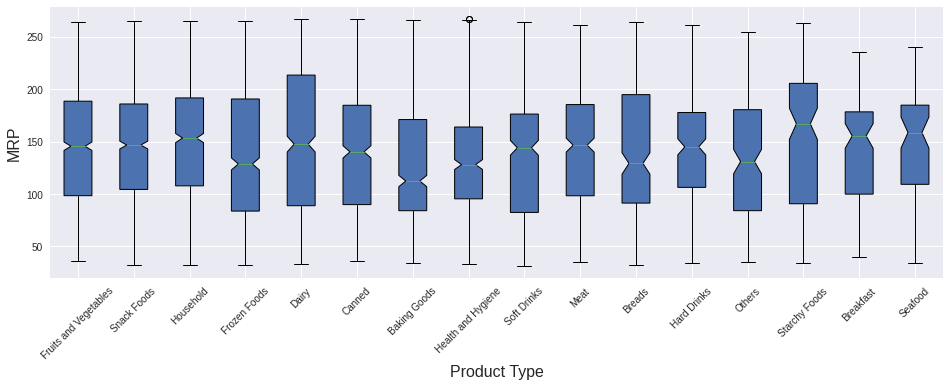

In [25]:
# Since the labels are overlapping on the above boxplot we
# will take the time to construct a prettier set of boxplots.

# Get the values to construct boxplots of
food_types = df['Item_Type'].value_counts().index
mrp = [df.loc[df['Item_Type'] == item_type, 'Item_MRP'] for item_type in food_types]

# Construct the boxplots
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 5));
boxplots = axes.boxplot(mrp,
                        labels = food_types,
                        patch_artist = True,
                        notch = True);
plt.xticks(rotation = 45);
plt.xlabel('Product Type', fontsize = 16);
plt.ylabel('MRP', fontsize = 16);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


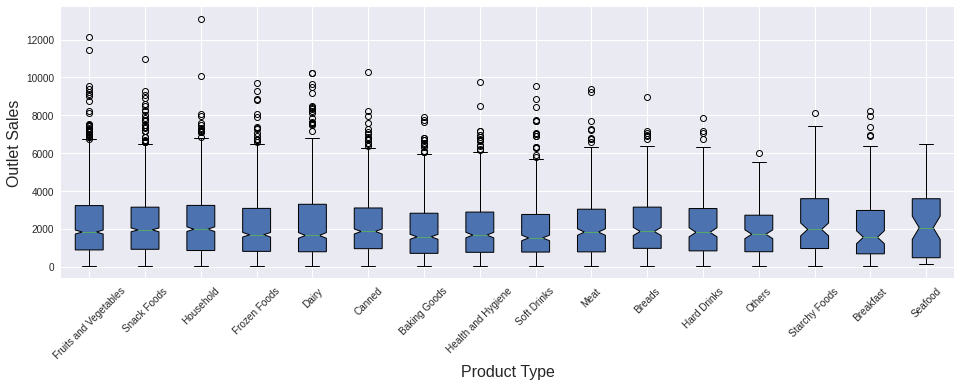

In [26]:
# Construct boxplots for 'Item Type' with the y-axis as 'Item Outlet Sales'.

outlet_sales_by_type = [df.loc[df['Item_Type'] == item_type, 'Item_Outlet_Sales'] for item_type in food_types]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 5));
boxplots = axes.boxplot(outlet_sales_by_type,
                        labels = food_types,
                        patch_artist = True,
                        notch = True);
plt.xticks(rotation = 45);
plt.xlabel('Product Type', fontsize = 16);
plt.ylabel('Outlet Sales', fontsize = 16);

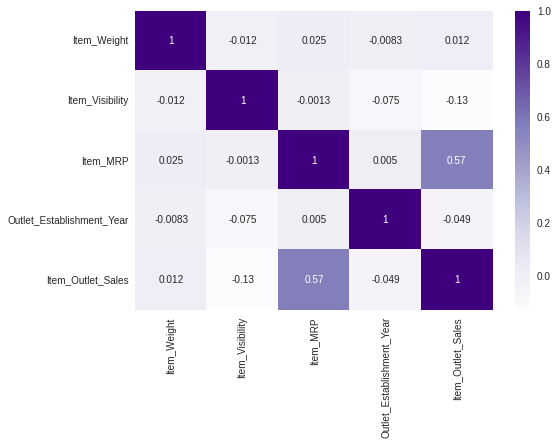

In [27]:
# Construct the heatmap
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);

## Part 4

Several graphs were constructed in the last part of this project. In this part we will build on some of these graphs.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


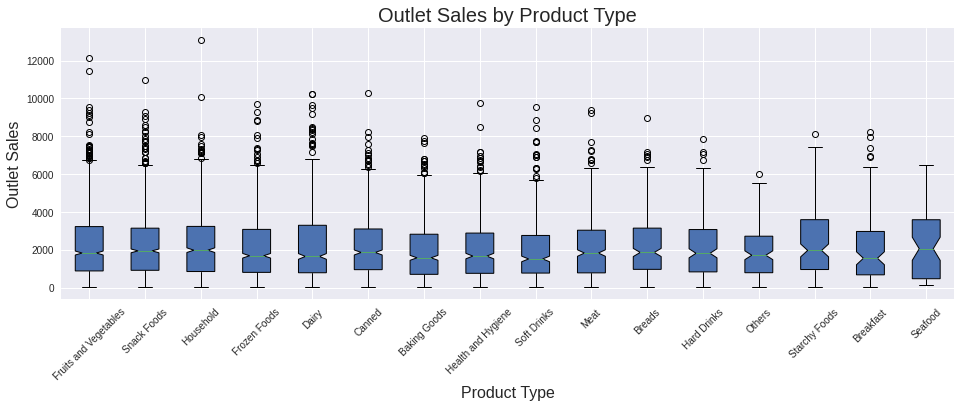

In [55]:
# This graph is copied directily from part 3. It gives boxplots of sales by 
# product type. This seems to be the sort of information a client or 
# employer would be interested in.

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 5));
boxplots = axes.boxplot(outlet_sales_by_type,
                        labels = food_types,
                        patch_artist = True,
                        notch = True);
plt.xticks(rotation = 45);
plt.xlabel('Product Type', fontsize = 16);
plt.ylabel('Outlet Sales', fontsize = 16);
plt.title('Outlet Sales by Product Type', fontsize = 20);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


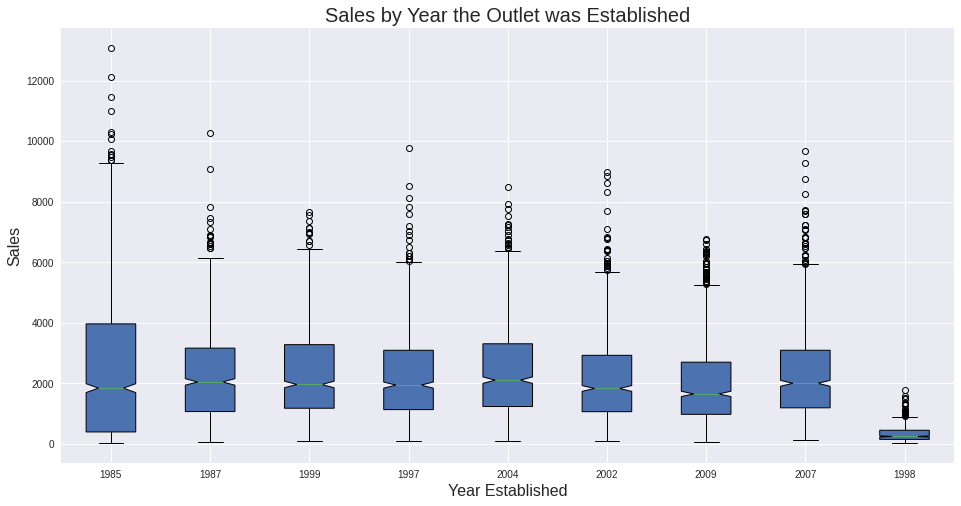

In [56]:
# Here we will reconstruct another figure from plot 3. This one was interesting in
# that it seems to suggest that outlets constructed in 1998 have lower sales. This 
# is of course an absurd correlation, but it is included as we would like to know
# why these outlets are generating fewer sales. 

# Get a list of years that outlets were established
year_established = df['Outlet_Establishment_Year'].value_counts().index
# Get the sales associated with outlet establishment year
outlet_sales_by_year = [df.loc[df['Outlet_Establishment_Year'] == year, 'Item_Outlet_Sales'] 
                        for year in year_established]

# Construct the boxplots
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8));
axes.boxplot(outlet_sales_by_year,
             labels = year_established,
             patch_artist = True,
             notch = True);

# Label the boxplots
plt.xlabel('Year Established', fontsize = 16);
plt.ylabel('Sales', fontsize = 16);
plt.title('Sales by Year the Outlet was Established', fontsize = 20);

It would be career ending to suggest that the year an outlet was constructed had such an extreme influence on sales. We would like to find the real reason for the low sales associated with outlets established in 1998. Our first clue comes from another graph constructed in part 3. We will take the time to make a nice boxplots for outlet sales by outlet identifier.

It is also worth noting that outlets established in 1985 have the highest sales, and that all the outlets established in years other than 1985 and 1998 have similar numbers for their sales. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


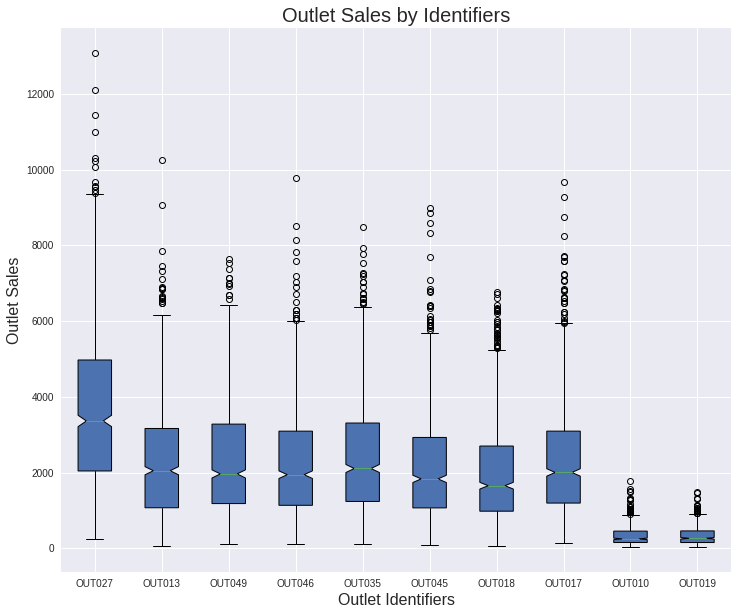

In [57]:
# Construct nice boxplots for outlet sales by outlet identifier.

# Construct a list of outlet identifiers
outlet_identifiers = df['Outlet_Identifier'].value_counts().index
# Get the sales associated with each identifier
outlet_sales_by_identifier = [df.loc[df['Outlet_Identifier'] == id, 'Item_Outlet_Sales']
                              for id in outlet_identifiers]

# Construct the boxplots
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 10));
axes.boxplot(outlet_sales_by_identifier,
             labels = outlet_identifiers,
             patch_artist = True,
             notch = True);

# Label the boxplots
plt.xlabel('Outlet Identifiers', fontsize = 16);
plt.ylabel('Outlet Sales', fontsize = 16);
plt.title('Outlet Sales by Identifiers', fontsize = 20);

We will now investigate the relationship between outlet identifier and the year the outlet was established.

In [58]:
year_est_by_id = df.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].value_counts()
display(year_est_by_id)
print()
outlet_type_by_id = df.groupby('Outlet_Type')['Outlet_Identifier'].value_counts()
outlet_type_by_id

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               935
                           OUT019               528
1987                       OUT013               932
1997                       OUT046               930
1998                       OUT010               555
1999                       OUT049               930
2002                       OUT045               929
2004                       OUT035               930
2007                       OUT017               926
2009                       OUT018               928
Name: Outlet_Identifier, dtype: int64

Outlet_Type        Outlet_Identifier
Grocery Store      OUT010               555
                   OUT019               528
Supermarket Type1  OUT013               932
                   OUT035               930
                   OUT046               930
                   OUT049               930
                   OUT045               929
                   OUT017               926
Supermarket Type2  OUT018               928
Supermarket Type3  OUT027               935
Name: Outlet_Identifier, dtype: int64

In a real world setting, I would still make some displays to summarize the above information in some sort of chart. Since these types of charts are outside of what we are covering we will simply use the information from the DataFrame to draw our conclusion. We see that there are two outlet IDs associated with the year 1985, and that there are approximately 50% more outlets established in 1985 than in other years with the exceptyon of 1990 when about 50% fewer outlets were established. This helps explain why 1998 had significantly lower sales and why 1985 had significantly higher sales, but it doesn't tell the whole story. 

The outlets with ID OUT027 were established in 1985. These outlets have sales significantly higher than outlets with other IDs. The outlets with these IDs are of type "Supermarket Type3". Perhaps these are stores with greater capacities, but we would need a subject matter expert to confirm that. The outlets with ID OUT010 were established in 1998 and the outlets with ID were established in 1985. There were about 500 of each of these outlets established, and they have significantly lower sales than the other outlets. These IDs are associated with the outlet type "Grocery Store". Compared with the outlets of type "supermarket" it seems reasonable to conclude that their lower sales is due to being smaller stores with less capacity and fewer of them being established. About 500 of each grocery store was established, where about 900 of each supermarket was established. These are only conjectures and we would still prefer to consult a subject matter expert to confirm or deny these observations.